### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
# Convert the dataset to a DataFrame
sunspots_df = pd.read_csv('data/Sunspots.csv')

sunspots_df['Date'] = pd.to_datetime(sunspots_df['Date'])
sunspots_df.head()
# Create a new DataFrame with the index set
sunspots_df = sunspots_df.set_index('Date')
sunspots_df = sunspots_df.drop(columns=['Unnamed: 0'])
sunspots_df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


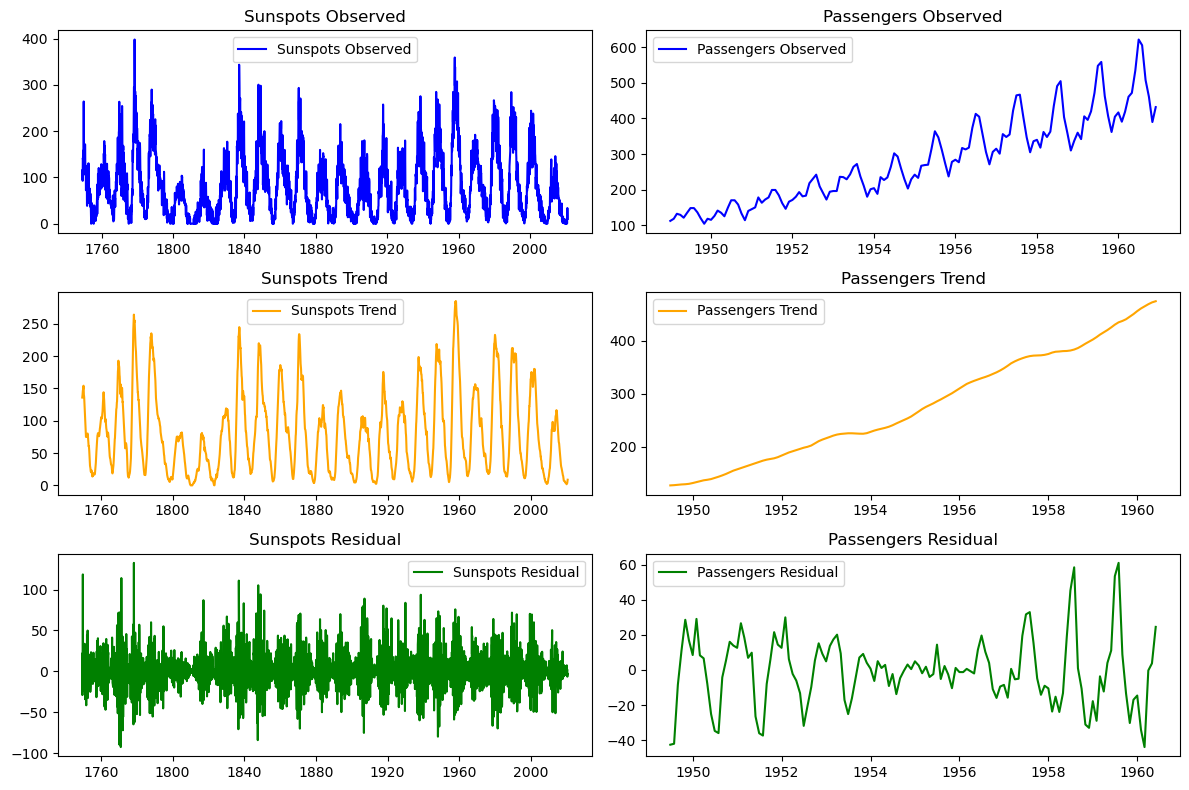

In [91]:
# Set the 'YEAR' column as the index
#sunspots_df.set_index('YEAR', inplace=True)

# truncate the sunspots data to better compare w/ air
#sunspots_short = sunspots_df['1940':'1970']

df = pd.read_csv('data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])

# Create a new DataFrame with the index set
passengers_df = df.set_index('Month')

# Perform seasonal decomposition for both datasets using the additive model
result_sunspots = seasonal_decompose(sunspots_df, model='additive')
result_passengers = seasonal_decompose(passengers_df, model='additive')

# Plot decomposed components of both datasets in one plot
plt.figure(figsize=(12, 8))

# Sunspots dataset
plt.subplot(3, 2, 1)
plt.plot(sunspots_df.index, result_sunspots.observed, label='Sunspots Observed', color='blue')
plt.legend()
plt.title('Sunspots Observed')

plt.subplot(3, 2, 3)
plt.plot(sunspots_df.index, result_sunspots.trend, label='Sunspots Trend', color='orange')
plt.legend()
plt.title('Sunspots Trend')

plt.subplot(3, 2, 5)
plt.plot(sunspots_df.index, result_sunspots.resid, label='Sunspots Residual', color='green')
plt.legend()
plt.title('Sunspots Residual')

# Passengers dataset
plt.subplot(3, 2, 2)
plt.plot(passengers_df.index, result_passengers.observed, label='Passengers Observed', color='blue')
plt.legend()
plt.title('Passengers Observed')

plt.subplot(3, 2, 4)
plt.plot(passengers_df.index, result_passengers.trend, label='Passengers Trend', color='orange')
plt.legend()
plt.title('Passengers Trend')

plt.subplot(3, 2, 6)
plt.plot(passengers_df.index, result_passengers.resid, label='Passengers Residual', color='green')
plt.legend()
plt.title('Passengers Residual')

plt.tight_layout()
plt.show()